In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Cluster:
    def __init__(self, d, centroid):
        self.d = d
        self.centroid = centroid
    
    def dist(self, point):
        return np.linalg.norm(self.centroid - point)

In [3]:
class KMeans:
    def __init__(self, k, d, low=0, high=1):
        self.d = d
        self.k = k
        
        self.clusters = [Cluster(self.d, np.random.uniform(low, high, (self.d))) for _ in range(k)]
    
    def fit(self, X, n_iters=100):
        
        sums = [np.zeros((self.d)) for c in range(self.k)]
        counts = [0 for c in range(self.k)]
        
        for i in range(n_iters):
            for p in range(len(X)):
                assigned_cluster = np.argmin([cluster.dist(X[p]) for cluster in self.clusters])
                sums[assigned_cluster] += X[p]
                counts[assigned_cluster] += 1
        
        for c in range(self.k):
            self.clusters[c].centroid = sums[c] / counts[c]
    
    def get_cluster_assignments(self):
        assignments = [[] for c in range(self.k)]
        
        for p in range(len(X)):
            assigned_cluster = np.argmin([cluster.dist(X[p]) for cluster in self.clusters])
            assignments[assigned_cluster].append(X[p])
        
        return assignments

In [4]:
X1 = np.random.multivariate_normal(mean=[1, 1], cov=[[1, 0], [0, 1]], size=(100))
X2 = np.random.multivariate_normal(mean=[10, 1], cov=[[1, 0], [0, 1]], size=(100))
X3 = np.random.multivariate_normal(mean=[10, 19], cov=[[1, 0], [0, 1]], size=(100))
X = np.concatenate([X1, X2, X3])

In [5]:
kmeans = KMeans(k=3, d=2, low=0, high=20)

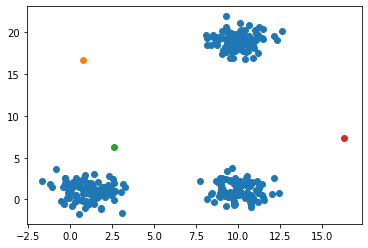

In [6]:
plt.scatter([x for x, _ in X], [y for _, y in X])

for cluster in kmeans.clusters:
    plt.scatter([cluster.centroid[0]], [cluster.centroid[1]])

In [7]:
kmeans.fit(X, n_iters=500)

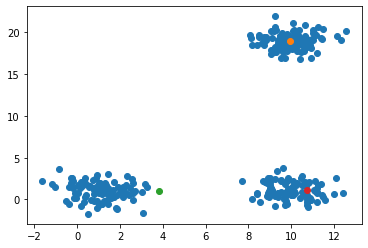

In [8]:
plt.scatter([x for x, _ in X], [y for _, y in X])

for cluster in kmeans.clusters:
    plt.scatter([cluster.centroid[0]], [cluster.centroid[1]])

In [9]:
assignments = kmeans.get_cluster_assignments()

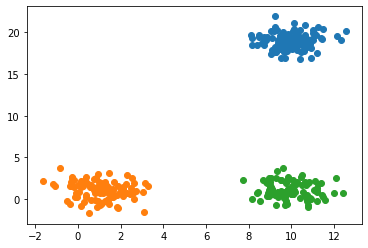

In [10]:
for cluster in assignments:
    plt.scatter([x for x, _ in cluster], [y for _, y in cluster])